In [77]:
import numpy as np
import pandas as pd

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [79]:
import plotly.plotly as py
import plotly.graph_objs as go
#import plotly.tools as tls
#tls.set_credentials_file(username='drozen', api_key='GTP8SX2KBqr3loYdTVb6')

In [80]:
df = pd.read_csv('TangerineCC2016.csv')

In [81]:
df = df[df['Transaction']=='DEBIT'] 
df = df[df['Memo'].notnull()] # remove null entries

In [82]:
df['Amount'] = df['Amount'].apply(pd.to_numeric, errors='coerce') *-1 #convert to int and convert amounts to positive
df['Transaction date'] = pd.to_datetime(df['Transaction date']) # get date info
df['Month'] = df['Transaction date'].apply(lambda x : x.month)
df['Day'] = df['Transaction date'].apply(lambda x : x.day)
df['Day of Week'] = df['Transaction date'].apply(lambda x : x.dayofweek)
df.head()

,Transaction date,Transaction,Name,Memo,Amount,Month,Day,Day of Week
0,2016-06-07,DEBIT,SAVOURS FRESH MARKET L NORTH YOR,Rewards earned: 0.57 ~ Category: Groceries,14.17,6,7,1
1,2016-06-07,DEBIT,DR LAFFA ON THE GO TORONTO ON,Rewards earned: 1.08 ~ Category: Restaurant,27.10,6,7,1
2,2016-06-06,DEBIT,SAVOURS FRESH MARKET L NORTH YOR,Rewards earned: 1.93 ~ Category: Groceries,48.16,6,6,0
3,2016-06-06,DEBIT,ESSO NORTH YORK ON,Rewards earned: 1.82 ~ Category: Gas,45.60,6,6,0
6,2016-06-01,DEBIT,COLLEGE OF OCCUPATIONA TORONTO O,Rewards earned: 7.43 ~ Category: Other,743.03,6,1,2


In [83]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
DayOfWeek = list(map(lambda var: dmap[var],df['Day of Week']))
df['Day of Week'] = DayOfWeek
df.head()

,Transaction date,Transaction,Name,Memo,Amount,Month,Day,Day of Week
0,2016-06-07,DEBIT,SAVOURS FRESH MARKET L NORTH YOR,Rewards earned: 0.57 ~ Category: Groceries,14.17,6,7,Tue
1,2016-06-07,DEBIT,DR LAFFA ON THE GO TORONTO ON,Rewards earned: 1.08 ~ Category: Restaurant,27.10,6,7,Tue
2,2016-06-06,DEBIT,SAVOURS FRESH MARKET L NORTH YOR,Rewards earned: 1.93 ~ Category: Groceries,48.16,6,6,Mon
3,2016-06-06,DEBIT,ESSO NORTH YORK ON,Rewards earned: 1.82 ~ Category: Gas,45.60,6,6,Mon
6,2016-06-01,DEBIT,COLLEGE OF OCCUPATIONA TORONTO O,Rewards earned: 7.43 ~ Category: Other,743.03,6,1,Wed



# Transaction types

In [84]:
def returnCategory(x):
    return x.split(' ~ Category: ')[1]

def returnName(x):
    return x.split(' ')[0]

In [85]:
# create category column
df['Category']=df['Memo'].apply(returnCategory)

# create single name column
df['Single Name']=df['Name'].apply(returnName)

df.head()

,Transaction date,Transaction,Name,Memo,Amount,Month,Day,Day of Week,Category,Single Name
0,2016-06-07,DEBIT,SAVOURS FRESH MARKET L NORTH YOR,Rewards earned: 0.57 ~ Category: Groceries,14.17,6,7,Tue,Groceries,SAVOURS
1,2016-06-07,DEBIT,DR LAFFA ON THE GO TORONTO ON,Rewards earned: 1.08 ~ Category: Restaurant,27.10,6,7,Tue,Restaurant,DR
2,2016-06-06,DEBIT,SAVOURS FRESH MARKET L NORTH YOR,Rewards earned: 1.93 ~ Category: Groceries,48.16,6,6,Mon,Groceries,SAVOURS
3,2016-06-06,DEBIT,ESSO NORTH YORK ON,Rewards earned: 1.82 ~ Category: Gas,45.60,6,6,Mon,Gas,ESSO
6,2016-06-01,DEBIT,COLLEGE OF OCCUPATIONA TORONTO O,Rewards earned: 7.43 ~ Category: Other,743.03,6,1,Wed,Other,COLLEGE


In [86]:
df['Name'].value_counts().head(15)

SAVOURS FRESH MARKET L NORTH YOR    31
ESSO NORTH YORK ON                  13
COSTCO WHOLESALE W535 TORONTO ON    13
VESTA *CHATR 888-278-5588 BC        10
NOFRILLS PATS 1330 NORTH YORK ON    10
SHOPPERS DRUG MART #08 NORTH YOR     8
WAL-MART # 3105 TORONTO ON           7
HERMES BAKERY LTD NORTH YORK ON      7
FORTINO'S NORTH YORK ON              6
DR LAFFA ON THE GO TORONTO ON        6
CDN TIRE STORE #00019 NORTH YORK     4
PETROCAN TORONTO ON                  4
THE KOSHER GOURMET TORONTO ON        3
LOBLAW SUPERMARKET #10 TORONTO O     3
ABE'S SERVICE CENTRE NORTH YORK      3
Name: Name, dtype: int64

# find total Tangerine category (eg. gas) purchases for the year

In [87]:
df['Memo'].apply(returnCategory).value_counts()

Other               78
Groceries           63
Gas                 26
Restaurant          20
Drug Store          14
Bill Payment        13
Parking              5
Home Improvement     5
Furniture            2
Hotel                1
Entertainment        1
Name: Memo, dtype: int64

In [88]:
dfCat = df.groupby(['Category','Day of Week']).sum()
dfCatUnstacked = dfCat.unstack()['Amount']
dfCatUnstacked

Day of Week,Fri,Mon,Sat,Sun,Thu,Tue,Wed
Category,,,,,,,
Bill Payment,785.21,2145.25,28.25,28.25,90.40,85.02,28.25
Drug Store,57.61,78.35,24.85,114.06,116.01,17.24,6.17
Entertainment,NaN,NaN,NaN,NaN,NaN,44.96,NaN
Furniture,NaN,NaN,NaN,NaN,NaN,89.34,NaN
Gas,47.82,154.61,NaN,161.72,151.83,139.01,196.41
Groceries,246.33,526.94,36.31,742.22,483.64,396.13,533.10
Home Improvement,NaN,NaN,NaN,14.67,NaN,82.47,56.49
Hotel,NaN,NaN,NaN,NaN,NaN,NaN,154.06
Other,963.29,114.98,33.89,530.72,797.26,3526.76,1885.26


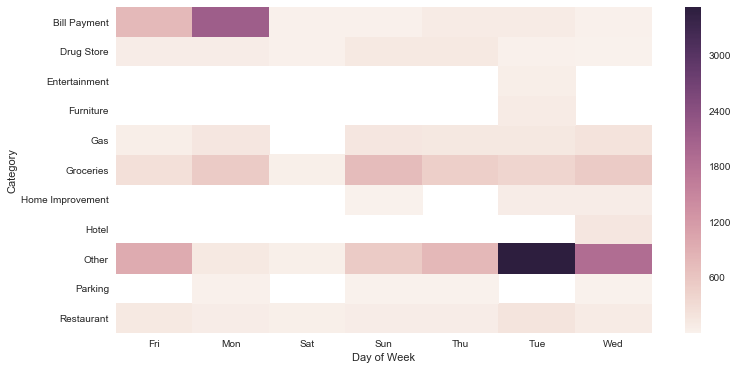

In [89]:
plt.figure(figsize=(12,6))
sns.heatmap(dfCatUnstacked)

In [90]:
#sns.clustermap(dfCatUnstacked)

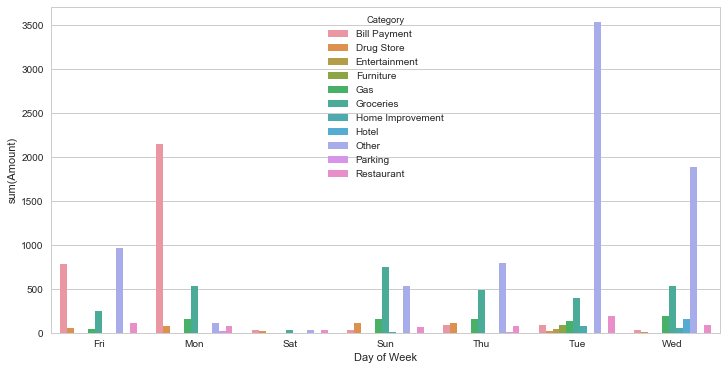

In [91]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.barplot(ax=ax, x='Day of Week', y = 'Amount', data = dfCat.reset_index(), hue = 'Category', estimator=sum
    )
#plt.tight_layout()

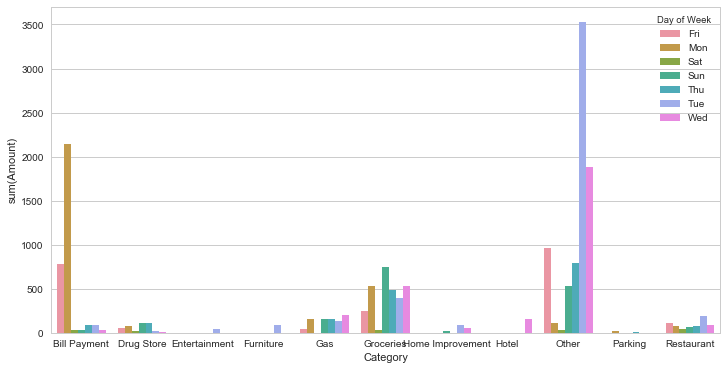

In [92]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.barplot(x='Category', y = 'Amount', data = dfCat.reset_index(), hue = 'Day of Week', estimator=sum, ax=ax)

In [93]:
categoryList = df['Memo'].apply(returnCategory).unique()

In [94]:
categoryList

array(['Groceries', 'Restaurant', 'Gas', 'Other', 'Bill Payment',
       'Home Improvement', 'Drug Store', 'Parking', 'Furniture', 'Hotel',
       'Entertainment'], dtype=object)

In [95]:
nameAmtDict = {}
def nameAmt(name, df=df):
    dfCat = df[df['Name'].apply(returnName)==name]
    dfCat = dfCat.apply(pd.to_numeric, errors='coerce') #convert to int
    returnVal = round(dfCat['Amount'].sum()*-1,2)
    print("%.2f" % returnVal)
    return round(returnVal, 2)

In [96]:
def updateDict(name):
    nameAmtDict[name] = nameAmt(name)

In [97]:
df['Name'].apply(returnName).value_counts().head(20)                                   

SAVOURS             31
COSTCO              14
ESSO                13
VESTA               10
NOFRILLS            10
SHOPPERS             9
WAL-MART             9
THE                  8
HERMES               7
DR                   6
PETROCAN             6
FORTINO'S            6
WINNERS              5
CDN                  5
SHELL                5
WINNERSHOMESENSE     3
ABE'S                3
SIMCHAS              3
LOBLAW               3
CARTER'S             2
Name: Name, dtype: int64

In [98]:
nameList = ["WAL-MART", "WINNERS", "CARTER'S", "WINNERSHOMESENSE"]

In [99]:
for name in nameList:
    updateDict(name)

-490.98
-118.60
-69.23
-70.04


In [100]:
nameAmtDict

{"CARTER'S": -69.23,
 'WAL-MART': -490.98,
 'WINNERS': -118.6,
 'WINNERSHOMESENSE': -70.04}

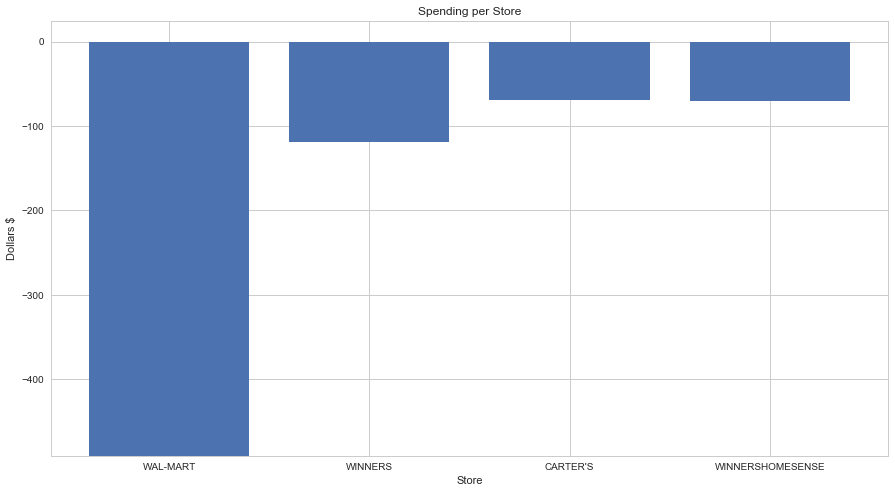

In [101]:
D = nameAmtDict

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.title("Spending per Store")
plt.xlabel("Store")
plt.ylabel("Dollars $")
plt.figure(figsize=(100,100))

plt.show()

In [102]:
labels=list(D.keys())
values=list(D.values())
trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

In [103]:
categoryAmtDict = {}
def categoryAmt(category, df=df):
    dfCat = df[df['Memo'].apply(returnCategory)==category]
    dfCat = dfCat.apply(pd.to_numeric, errors='coerce') #convert to int
    returnVal = round(dfCat['Amount'].sum()*-1,2)
    print("%.2f" % returnVal)
    return round(returnVal, 2)

In [104]:
def updateDict(category):
    categoryAmtDict[category] = categoryAmt(category)

In [105]:
for cat in categoryList:
    updateDict(cat)

-2964.67
-644.99
-851.40
-7852.16
-3190.63
-153.63
-414.29
-31.35
-89.34
-154.06
-44.96


In [106]:
categoryAmtDict

{'Bill Payment': -3190.63,
 'Drug Store': -414.29,
 'Entertainment': -44.96,
 'Furniture': -89.34,
 'Gas': -851.4,
 'Groceries': -2964.67,
 'Home Improvement': -153.63,
 'Hotel': -154.06,
 'Other': -7852.16,
 'Parking': -31.35,
 'Restaurant': -644.99}

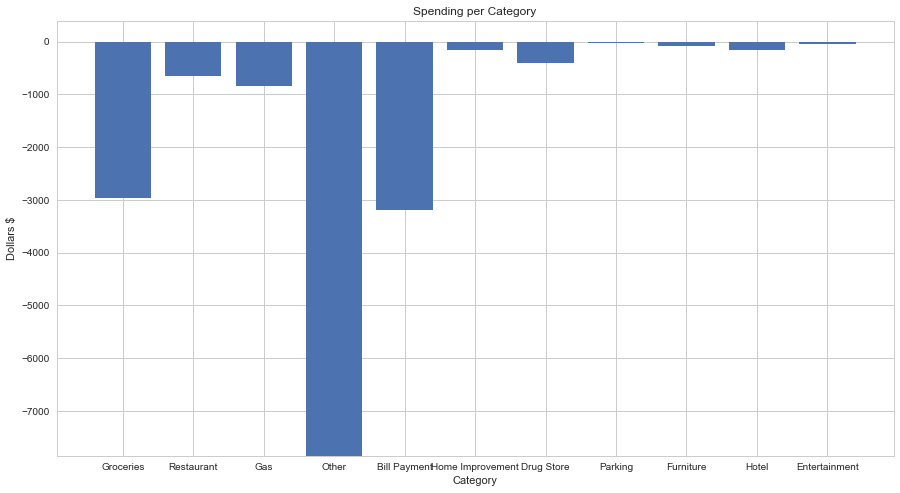

In [107]:
D = categoryAmtDict

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.title("Spending per Category")
plt.xlabel("Category")
plt.ylabel("Dollars $")
#plt.figure(figsize=(100,100))

plt.show()

In [108]:
labels=list(D.keys())
values=list(D.values())
trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

Find Abes records

In [137]:
dfAbes = df[df['Name'].apply(lambda x: x.split(' ')[0])=="ABE'S"]

In [138]:
dfAbes

,Transaction date,Transaction,Name,Memo,Amount,Month,Day,Day of Week,Category,Single Name
77,2016-09-02,DEBIT,ABE'S SERVICE CENTRE NORTH YORK,Rewards earned: 0.66 ~ Category: Other,65.53,9,2,Fri,Other,ABE'S
126,2016-09-20,DEBIT,ABE'S SERVICE CENTRE NORTH YORK,Rewards earned: 2.36 ~ Category: Other,235.61,9,20,Tue,Other,ABE'S
133,2016-09-13,DEBIT,ABE'S SERVICE CENTRE NORTH YORK,Rewards earned: 1.24 ~ Category: Other,124.30,9,13,Tue,Other,ABE'S


Investigate BillPayment category transactions

In [111]:
dfBill = df[df['Memo'].apply(returnCategory)=="Bill Payment"]

In [112]:
dfBill.head(10)

,Transaction date,Transaction,Name,Memo,Amount,Month,Day,Day of Week,Category,Single Name
11,2016-05-26,DEBIT,VESTA *CHATR 888-278-5588 BC,Rewards earned: 0.51 ~ Category: Bill Payment,50.85,5,26,Thu,Bill Payment,VESTA
12,2016-05-26,DEBIT,VESTA *CHATR 888-278-5588 BC,Rewards earned: 0.40 ~ Category: Bill Payment,39.55,5,26,Thu,Bill Payment,VESTA
13,2016-05-24,DEBIT,Uber BV help.uber.com NLD NLD,Rewards earned: 0.17 ~ Category: Bill Payment,17.22,5,24,Tue,Bill Payment,Uber
40,2016-06-26,DEBIT,VESTA *CHATR 888-278-5588 BC,Rewards earned: 0.28 ~ Category: Bill Payment,28.25,6,26,Sun,Bill Payment,VESTA
59,2016-07-26,DEBIT,VESTA *CHATR 888-278-5588 BC,Rewards earned: 0.57 ~ Category: Bill Payment,28.25,7,26,Tue,Bill Payment,VESTA
89,2016-08-26,DEBIT,VESTA *CHATR 888-278-5588 BC,Rewards earned: 0.57 ~ Category: Bill Payment,28.25,8,26,Fri,Bill Payment,VESTA
117,2016-09-26,DEBIT,VESTA *CHATR 888-278-5588 BC,Rewards earned: 0.57 ~ Category: Bill Payment,28.25,9,26,Mon,Bill Payment,VESTA
159,2016-10-26,DEBIT,VESTA *CHATR 888-278-5588 BC,Rewards earned: 0.57 ~ Category: Bill Payment,28.25,10,26,Wed,Bill Payment,VESTA
194,2016-12-02,DEBIT,SUN LIFE CHOICES A&A 800-669-792,Rewards earned: 15.14 ~ Category: Bill Payment,756.96,12,2,Fri,Bill Payment,SUN
202,2016-11-26,DEBIT,VESTA *CHATR 888-278-5588 BC,Rewards earned: 0.57 ~ Category: Bill Payment,28.25,11,26,Sat,Bill Payment,VESTA


In [113]:
dfOther = df[df['Memo'].apply(returnCategory)=="Other"]

In [142]:
dfOther.head(80)

,Transaction date,Transaction,Name,Memo,Amount,Month,Day,Day of Week,Category,Single Name
6,2016-06-01,DEBIT,COLLEGE OF OCCUPATIONA TORONTO O,Rewards earned: 7.43 ~ Category: Other,743.03,6,1,Wed,Other,COLLEGE
9,2016-05-27,DEBIT,BEST BUY.CA # 900 MISSISSAUGA ON,Rewards earned: 0.97 ~ Category: Other,96.89,5,27,Fri,Other,BEST
18,2016-05-18,DEBIT,123InkCartridges.ca LACHINE QC,Rewards earned: 0.59 ~ Category: Other,59.19,5,18,Wed,Other,123InkCartridges.ca
19,2016-05-18,DEBIT,CANADIAN FRIENDS OF MI NORTH YOR,Rewards earned: 0.20 ~ Category: Other,20.00,5,18,Wed,Other,CANADIAN
20,2016-05-17,DEBIT,PAYPATH S FEE GA TECH 0913599669,Rewards earned: 0.29 ~ Category: Other,29.32,5,17,Tue,Other,PAYPATH
21,2016-05-17,DEBIT,GA INST TECH PAYPATH 09135996699,Rewards earned: 10.66 ~ Category: Other,1066.33,5,17,Tue,Other,GA
39,2016-06-28,DEBIT,LCBO/RAO #657 TORONTO ON,Rewards earned: 1.00 ~ Category: Other,100.15,6,28,Tue,Other,LCBO/RAO
49,2016-06-10,DEBIT,MIRIAMS GIFT GALLERY TORONTO ON,Rewards earned: 0.82 ~ Category: Other,81.90,6,10,Fri,Other,MIRIAMS
54,2016-08-07,DEBIT,COSTCO WHOLESALE W535 TORONTO ON,Rewards earned: 0.64 ~ Category: Other,64.13,8,7,Sun,Other,COSTCO
57,2016-07-29,DEBIT,COSTCO WHOLESALE W535 TORONTO ON,Rewards earned: 0.65 ~ Category: Other,64.73,7,29,Fri,Other,COSTCO


In [143]:
dfOld= dfOther[dfOther['Name'].apply(lambda x: x.split(' ')[0])=="HOMESENSE"]
dfOld.head()

,Transaction date,Transaction,Name,Memo,Amount,Month,Day,Day of Week,Category,Single Name
217,2016-11-13,DEBIT,HOMESENSE 107 TORONTO ON,Rewards earned: 0.23 ~ Category: Other,22.59,11,13,Sun,Other,HOMESENSE
223,2016-11-11,DEBIT,HOMESENSE 107 TORONTO ON,Rewards earned: 1.13 ~ Category: Other,112.97,11,11,Fri,Other,HOMESENSE


# Investigate sums by names

In [115]:
byName = df.groupby('Name')
byName.sum()

,Amount,Month,Day
Name,,,
123InkCartridges.ca LACHINE QC,59.19,5,18
3M LAWRENCE PHARMACY NORTH YORK,130.54,15,32
ABE'S SERVICE CENTRE NORTH YORK,425.44,27,35
AROMA BATHUST & WILSON NORTH YOR,13.05,9,20
AUBERGE LA PORTE ROUGE MONT-TREM,154.06,5,4
AXESS LAW PROFESSIONAL TORONTO O,225.98,4,19
BENTZYS KOSHER FOOD DE OUTREMONT,14.61,5,3
BEST BUY.CA # 900 MISSISSAUGA ON,96.89,5,27
BISTRO GRANDE TORONTO ON,67.12,7,3


In [116]:
df.groupby('Single Name').sum()

,Amount,Month,Day
Single Name,,,
123InkCartridges.ca,59.19,5,18
3M,130.54,15,32
ABE'S,425.44,27,35
AROMA,13.05,9,20
AUBERGE,154.06,5,4
AXESS,225.98,4,19
BENTZYS,14.61,5,3
BEST,96.89,5,27
BISTRO,67.12,7,3


###### Report sums only for purchases > 6

In [117]:
df.groupby('Single Name').sum()[df.groupby('Single Name').count()['Name']>4]

,Amount,Month,Day
Single Name,,,
CDN,153.63,39,101
COSTCO,2058.51,137,175
DR,160.35,49,54
ESSO,452.13,102,188
FORTINO'S,249.12,46,106
HERMES,130.92,59,124
NOFRILLS,1443.55,89,212
PETROCAN,196.22,47,76
SAVOURS,890.12,241,444


In [118]:
dfmean = df.groupby('Single Name').mean()[df.groupby('Single Name').count()['Name']>6]
dfmean.reset_index() #turn index into a column

,Single Name,Amount,Month,Day
0,COSTCO,147.036429,9.785714,12.500000
1,ESSO,34.779231,7.846154,14.461538
2,HERMES,18.702857,8.428571,17.714286
3,NOFRILLS,144.355000,8.900000,21.200000
4,SAVOURS,28.713548,7.774194,14.322581
5,SHOPPERS,18.031111,9.666667,11.888889
6,THE,89.826250,7.875000,16.875000
7,VESTA,29.945000,6.900000,26.000000
8,WAL-MART,54.553333,9.666667,16.000000


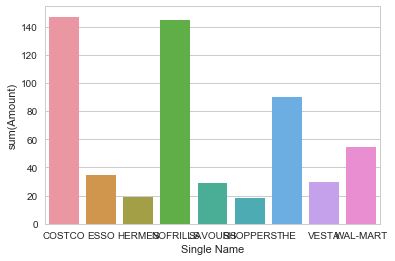

In [119]:
ax = sns.barplot(x='Single Name', y='Amount',data=dfmean.reset_index(),estimator=sum)

# BMO Mastercard data

In [120]:
df1 = pd.read_csv('MosaikRemaningData2016.csv')

In [121]:
df1backup = df1

In [122]:
df1backup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
DATE             101 non-null object
POSTING DATE     83 non-null object
DESCRIPTION      96 non-null object
Unnamed: 3       22 non-null object
Unnamed: 4       3 non-null object
REFERENCE NO.    88 non-null object
AMOUNT ($)       97 non-null object
dtypes: object(7)
memory usage: 5.7+ KB


In [123]:
df1 = df1[df1['DESCRIPTION'].notnull()] # remove null entries
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 1 to 101
Data columns (total 7 columns):
DATE             96 non-null object
POSTING DATE     83 non-null object
DESCRIPTION      96 non-null object
Unnamed: 3       22 non-null object
Unnamed: 4       3 non-null object
REFERENCE NO.    88 non-null object
AMOUNT ($)       96 non-null object
dtypes: object(7)
memory usage: 6.0+ KB


In [124]:
df1.head(15)

,DATE,POSTING DATE,DESCRIPTION,Unnamed: 3,Unnamed: 4,REFERENCE NO.,AMOUNT ($)
1,Apr. 15 Apr. 18,NaN,CAA SOUTH CENTRAL ON -,THORNHILL,NaN,8.00114E+11,125.43
2,Apr. 16 Apr. 18,NaN,VESTA *CHATR,888-278-5588 BC,NaN,246573451,39.55
3,Apr. 18 Apr. 18,NaN,VESTA *CHATR,888-278-5588 BC,NaN,292048224,28.25
4,Apr. 26 Apr. 26,NaN,USD42.64@1.303236397 ABEBOOKS.COM,NaN,NaN,597020045,55.57
5,Apr. 27 Apr. 28,NaN,A NATURAL PATH TO HEAL,416-7821462 ON,NaN,2.81184E+11,137.23
6,May 6 May 6,NaN,AUTOMATIC PYMT RECEIVED,NaN,NaN,NaN,956.31 CR
7,May 11 May 12,NaN,TSI INTERNET,CHATHAM ON,NaN,8.0016E+11,37.28
8,Apr. 14,Apr. 18,CDN TIRE STORE #00019 NORTH YORK ON,NaN,NaN,8.00119E+11,15.81
9,Apr. 20,Apr. 21,NOFRILLS PATS 1330 NORTH YORK ON,NaN,NaN,4.62683E+11,142.06
10,Apr. 20,Apr. 21,SAVOURS FRESH MARKET L NORTH YORK ON,NaN,NaN,7.31126E+11,61.4



# Transaction types

In [125]:
descriptionAmtDict = {}
def descriptionAmt(description, df=df1):
    dfCat = df[df['DESCRIPTION'].apply(returnName)==description]
    dfCat = dfCat.apply(pd.to_numeric, errors='coerce') #convert to int
    returnVal = round(dfCat['AMOUNT ($)'].sum(),2)
    print("%.2f" % returnVal)
    return round(returnVal, 2)

In [126]:
def updateDictBMO(description):
    descriptionAmtDict[description] = descriptionAmt(description)

In [127]:
df1['DESCRIPTION'].value_counts().head(25)      

AUTOMATIC PYMT RECEIVED                 6
VESTA *CHATR 888-278-5588 BC            6
NOFRILLS PATS 1330 NORTH YORK ON        5
SAVOURS FRESH MARKET L NORTH YORK ON    5
ESSO NORTH YORK ON                      4
COSTCO WHOLESALE W535 TORONTO           4
TSI INTERNET CHATHAM                    3
WAL-MART # 3105 TORONTO ON              3
TSI INTERNET CHATHAM ON                 3
SHOPPERS DRUG MART #08 NORTH YORK ON    2
PAYMENT RECEIVED - THANK YOU            2
VESTA *CHATR                            2
BUNCH OF FUN PLAYLAND NORTH YORK ON     2
Amazon.ca AMAZON.CA                     2
INTEREST PURCHASES                      2
OLD NAVY CANADA ONLINE                  2
SAVOURS FRESH MARKET L NORTH YORK       2
COSTCO WHOLESALE W535                   2
CDN TIRE STORE #00019 NORTH YORK ON     2
ORANGE SQUARE INC NORTH YORK ON         1
A NATURAL PATH TO HEAL                  1
CARTER'S OSHKOSH THORNHILL ON           1
STATIONNEMENT VIEUX PO MONTREAL QC      1
TSI INTERNET                      

In [128]:
df1['DESCRIPTION'].apply(returnName).value_counts().head(15)                                   

VESTA        8
SAVOURS      7
TSI          7
COSTCO       6
AUTOMATIC    6
NOFRILLS     5
WAL-MART     4
ESSO         4
Amazon.ca    3
CARTER'S     3
PAYMENT      3
A            3
SHOPPERS     2
OLD          2
INTEREST     2
Name: DESCRIPTION, dtype: int64

In [129]:
descriptionList = ["SAVOURS", "COSTCO", "NOFRILLS", "SHOPPERS", "WAL-MART", "ESSO", "CARTER'S", "OLD", "CDN"]

In [130]:
for description in descriptionList:
    updateDictBMO(description)

217.35
334.88
816.03
49.78
132.85
123.64
52.50
100.08
51.72


In [131]:
descriptionAmtDict

{"CARTER'S": 52.5,
 'CDN': 51.72,
 'COSTCO': 334.88,
 'ESSO': 123.64,
 'NOFRILLS': 816.03,
 'OLD': 100.08,
 'SAVOURS': 217.35,
 'SHOPPERS': 49.78,
 'WAL-MART': 132.85}

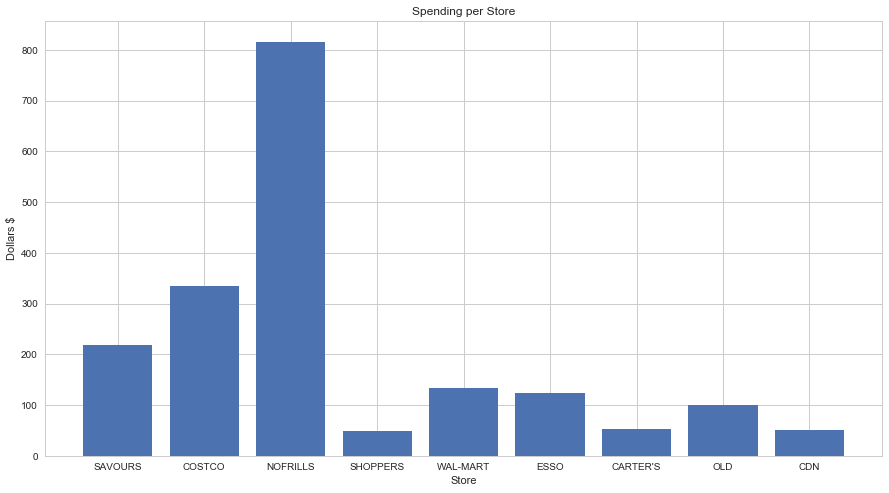

In [132]:
D = descriptionAmtDict

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.title("Spending per Store")
plt.xlabel("Store")
plt.ylabel("Dollars $")
plt.figure(figsize=(100,100))

plt.show()

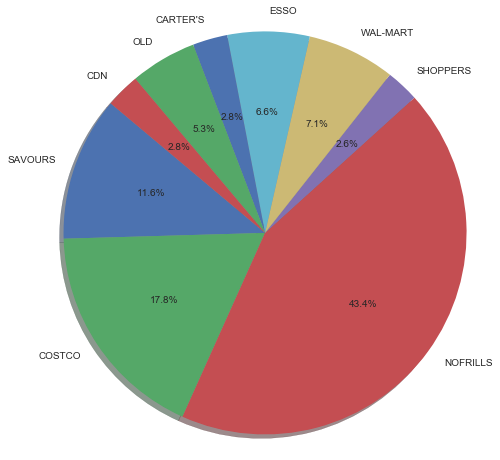

In [133]:
labels=list(D.keys())
values=list(D.values())

# Plot
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(values, labels=labels, shadow=True, startangle=140, autopct='%1.1f%%')
 
plt.axis('equal')
plt.show()

In [134]:
labels=list(D.keys())
values=list(D.values())
trace=go.Pie(labels=labels,values=values)
py.iplot([trace])